In [2]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
file = 'crypto_data.csv'

In [4]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
labels = df['IsTrading'].values
data = df.drop('IsTrading', axis=1)

In [6]:
data.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
data = data.dropna()

In [8]:
data.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [9]:
mind_data = data[data['TotalCoinsMined']>0]

In [10]:
mind_data

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [11]:
mind_data = mind_data.drop('Unnamed: 0', 1)
mind_data = mind_data.drop('CoinName', 1)

C:\Users\kounn\AppData\Local\Temp\ipykernel_16556\3177324449.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mind_data = mind_data.drop('Unnamed: 0', 1)
C:\Users\kounn\AppData\Local\Temp\ipykernel_16556\3177324449.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mind_data = mind_data.drop('CoinName', 1)


In [12]:
mind_data

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [13]:
dummies_data = pd.get_dummies(mind_data)

In [14]:
dummies_data

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dummies_data)
scaled_data = scaler.transform(dummies_data)

In [17]:
scaled_data

array([[-0.11450078, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.09041991, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.55369883, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [-0.11433426, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11449785, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11401032, -0.04166667, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)

In [20]:
pca_data

array([[-2.61332729e-01, -1.22352275e-01,  6.06044979e-15, ...,
        -3.86826280e-01, -2.77658733e-01, -3.27493244e+00],
       [-2.43449798e-01, -1.23261196e-01,  6.41014745e-15, ...,
        -1.54483673e+00,  3.27180484e-01, -2.70081545e+00],
       [ 3.32289551e-01, -3.06487354e-02, -3.04213615e-15, ...,
        -5.88783433e-01, -3.93538533e-01, -8.74576691e-02],
       ...,
       [-2.73507346e-01, -2.08039991e-01,  3.57218498e-15, ...,
         4.14971154e-15,  1.66822574e-15, -1.46230413e-15],
       [-1.92625815e-01, -7.36990776e-02,  4.46804859e-15, ...,
         1.01040784e-12, -2.15764147e-13,  2.36929761e-13],
       [-1.92495649e-01, -1.18389368e-01,  4.87533145e-15, ...,
         7.50701584e-16,  1.46491073e-15,  4.17056436e-17]])

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250)
tsne_data = tsne.fit_transform(pca_data)

C:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [23]:
tsne_data.shape

(577, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

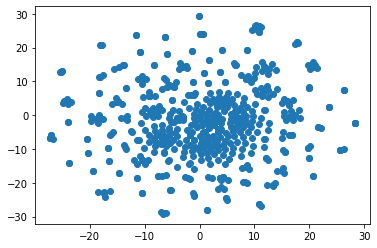

In [24]:
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show

There doesn't seem to be any defined clusters but you can see that there are some small groupings scattered about in a circular shape.

In [28]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_data)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

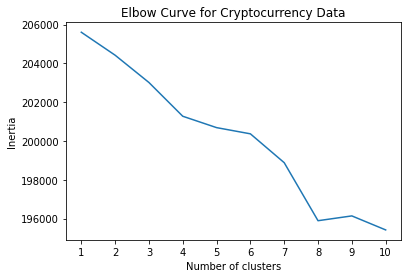

In [29]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Cryptocurrency Data')
plt.show()

There doesn't seem to be any clear clustterings, elbow curve, or useful trends/groupins when it comes to the cryptos.